In [1]:
# ROBERT HEETER
# ELEC 378 Machine Learning
# 3 February 2023

# PROBLEM SET 3


In [2]:
import scipy.io as sc
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# PROBLEM 1

# import file with vectors on each row
eaves_file = sc.loadmat('eavesdropping.mat')
eaves = eaves_file["Y"]


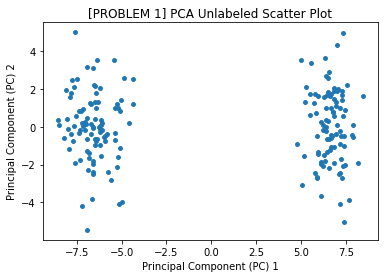

In [4]:
# PART A

# center the data by subtracting column (dimension) mean from each column
eaves_c = eaves-np.mean(eaves,axis=0)

# take SVD
(u,s,vh) = np.linalg.svd(eaves_c)

# pca transform matrix to reduce dimensionality to 2
PCA = np.dot(u,np.diag(s))[:,0:2]

# plot approximation
plt.scatter(PCA[:,0],PCA[:,1],s=15)
plt.title("[PROBLEM 1] PCA Unlabeled Scatter Plot")
plt.xlabel('Principal Component (PC) 1')
plt.ylabel('Principal Component (PC) 2')
plt.show()


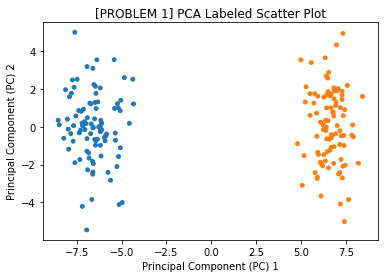

In [5]:
# PART B

# create a vector of binary labels indicating which cluster each data point lives in
assignment = np.where(PCA[:,0]>0,1,0)

# color and plot data 
colors = np.choose(assignment,['#1f77b4','#ff7f0e'])
plt.scatter(PCA[:,0],PCA[:,1],s=15,c=colors)
plt.title("[PROBLEM 1] PCA Labeled Scatter Plot")
plt.xlabel('Principal Component (PC) 1')
plt.ylabel('Principal Component (PC) 2')
plt.show()


In [6]:
# PART C

# choose a value for each bit
choices = np.choose(assignment,[0,1])

# reshape to 7-bit ASCII
reshaped = np.reshape(choices,(27,7))

# convert binary to ASCII to decode
message = ""
for i in reshaped:
    temp_string = ""
    for num in i:
        temp_string = temp_string + str(num)
    char = int(temp_string, 2)
    message = message + chr(char)
    
print('[PROBLEM 1] DECODED MESSAGE:')
print(message)


[PROBLEM 1] DECODED MESSAGE:
richb is love richb is life


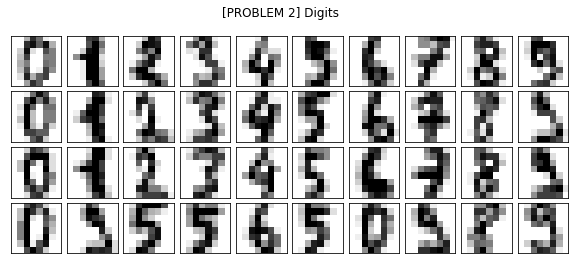

In [7]:
# PROBLEM 2

# load the data matrix containing as each row an unwrapped 
# array representation of an image of a handwritten digit
digits = np.load('digits.npy')

# show digits
fig, axes = plt.subplots(4, 10, figsize=(10, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
fig.suptitle('[PROBLEM 2] Digits')
for i, ax in enumerate(axes.flat):
    ax.imshow(digits[i].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))


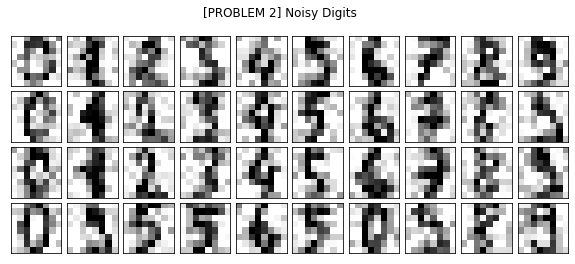

In [8]:
# add noise and show noisy digits
noise_amount = 3
noisy_digits = np.random.normal(digits.data, noise_amount)

fig, axes = plt.subplots(4, 10, figsize=(10, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
fig.suptitle('[PROBLEM 2] Noisy Digits')
for i, ax in enumerate(axes.flat):
    ax.imshow(noisy_digits[i].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))


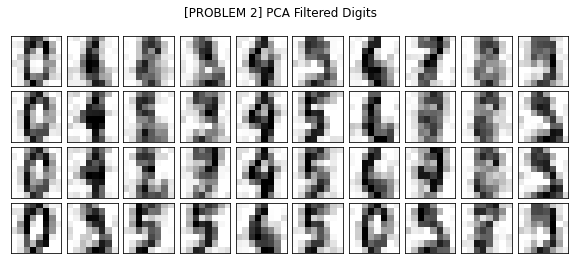

In [9]:
# center the data by subtracting column (dimension) mean from each column
noisy_digits_mean = np.mean(noisy_digits,axis=0)
noisy_digits_c = noisy_digits-noisy_digits_mean

# take SVD
[u,s,vh] = np.linalg.svd(noisy_digits_c)

# keep only the first q eigenvectors as V_q
# compute P_q * V_q^H = X_noisy * V_q * V_q^H
# view the results

# pca transform matrix
PCA = np.dot(u,np.diag(s))

# keep only the first q eigenvectors as v_q
q = 5
v_q_T = vh[0:q,:]

# compute noisy_digits_filtered = PCA*v_q^H = P_q*V_q^H
noisy_digits_filtered = np.matmul(PCA[:,0:q],v_q_T)

# add back column means to filtered digits
noisy_digits_filtered = noisy_digits_filtered + noisy_digits_mean

# show filtered digits
fig, axes = plt.subplots(4, 10, figsize=(10, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
fig.suptitle('[PROBLEM 2] PCA Filtered Digits')
for i, ax in enumerate(axes.flat):
    ax.imshow(noisy_digits_filtered[i].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
    

In [10]:
# PROBLEM 3

cancer = sc.loadmat('cancer.mat')
X = np.array(cancer['X'])
Y = ([y[0][:] for y in np.concatenate(cancer['Y'][:])])


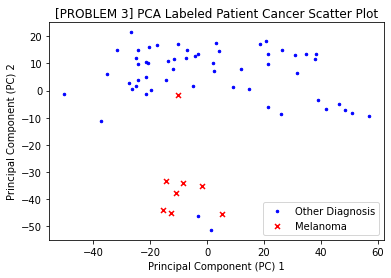

In [11]:
# PART A

# use PCA to reduce the dimensionality of X to 2
# display a scatterplot of the 2D representation
# including the corresponding labels in Y

# indices of patients with 'MELANOMA'
I_mel = np.char.startswith(Y,'MELANOMA') 

# Xmel_n = preprocessing.scale(Xmel,axis=0,with_mean=True)
# Xmel_n = preprocessing.normalize(Xmel_n,axis=0)

# center the data by subtracting column (dimension) mean from each column
X_c = X-np.mean(X,axis=0)

# take SVD
[X_u,X_s,X_vh] = np.linalg.svd(X_c)

# pca transform matrix to reduce dimensionality to 2
PCA = np.dot(X_u,np.diag(X_s))[:,0:2]

# color and plot data
plt.scatter(PCA[~I_mel,0],PCA[~I_mel,1],color='blue',s=25,marker='.',label='Other Diagnosis')
plt.scatter(PCA[I_mel,0],PCA[I_mel,1],color='red',s=25,marker='x',label='Melanoma')
plt.xlabel('Principal Component (PC) 1')
plt.ylabel('Principal Component (PC) 2')
plt.legend(loc="lower right")
plt.title('[PROBLEM 3] PCA Labeled Patient Cancer Scatter Plot')
plt.show()


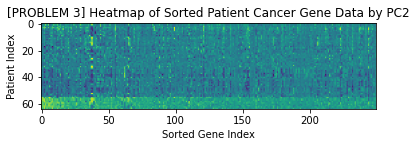

In [12]:
# PART C

# sort columns of X by v_j[k]
X_c_sorted = X_c[:,(X_vh[1,:]).argsort()]

# produce heatmap of sorted X
plt.imshow(X_c_sorted[:,0:250])
plt.xlabel('Sorted Gene Index')
plt.ylabel('Patient Index')
plt.title('[PROBLEM 3] Heatmap of Sorted Patient Cancer Gene Data by PC2')
plt.show()
